In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, f1_score, precision_score
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve
from IPython.display import display
import plotly.graph_objs as go
import plotly.subplots 

from sklearn.metrics import make_scorer, fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
path_train = 'train.csv'

In [4]:
X = pd.read_csv('train.csv')
y = pd.read_csv('train_Y.csv')

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                47363 non-null  float64
 1   HighChol              47363 non-null  float64
 2   CholCheck             47363 non-null  float64
 3   BMI                   47363 non-null  float64
 4   Smoker                47363 non-null  float64
 5   Stroke                47363 non-null  float64
 6   HeartDiseaseorAttack  47363 non-null  float64
 7   PhysActivity          47363 non-null  float64
 8   Fruits                47363 non-null  float64
 9   Veggies               47363 non-null  float64
 10  HvyAlcoholConsump     47363 non-null  float64
 11  AnyHealthcare         47363 non-null  float64
 12  NoDocbcCost           47363 non-null  float64
 13  GenHlth               47363 non-null  float64
 14  MentHlth              47363 non-null  float64
 15  PhysHlth           

In [6]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,47363.0,0.563879,0.495908,0.0,0.0,1.0,1.0,1.0
HighChol,47363.0,0.523468,0.499454,0.0,0.0,1.0,1.0,1.0
CholCheck,47363.0,0.975741,0.153855,0.0,1.0,1.0,1.0,1.0
BMI,47363.0,29.862551,7.144498,12.0,25.0,29.0,33.0,98.0
Smoker,47363.0,0.475118,0.499386,0.0,0.0,0.0,1.0,1.0
Stroke,47363.0,0.062834,0.242666,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,47363.0,0.148766,0.355861,0.0,0.0,0.0,0.0,1.0
PhysActivity,47363.0,0.701940,0.457411,0.0,0.0,1.0,1.0,1.0
Fruits,47363.0,0.610814,0.487571,0.0,0.0,1.0,1.0,1.0
Veggies,47363.0,0.788844,0.408133,0.0,1.0,1.0,1.0,1.0


In [12]:
X = pd.concat([X, y], axis=1)
X = X.drop_duplicates(keep='first')
X = X[~X.drop(columns=['Diabetes_binary']).duplicated()]

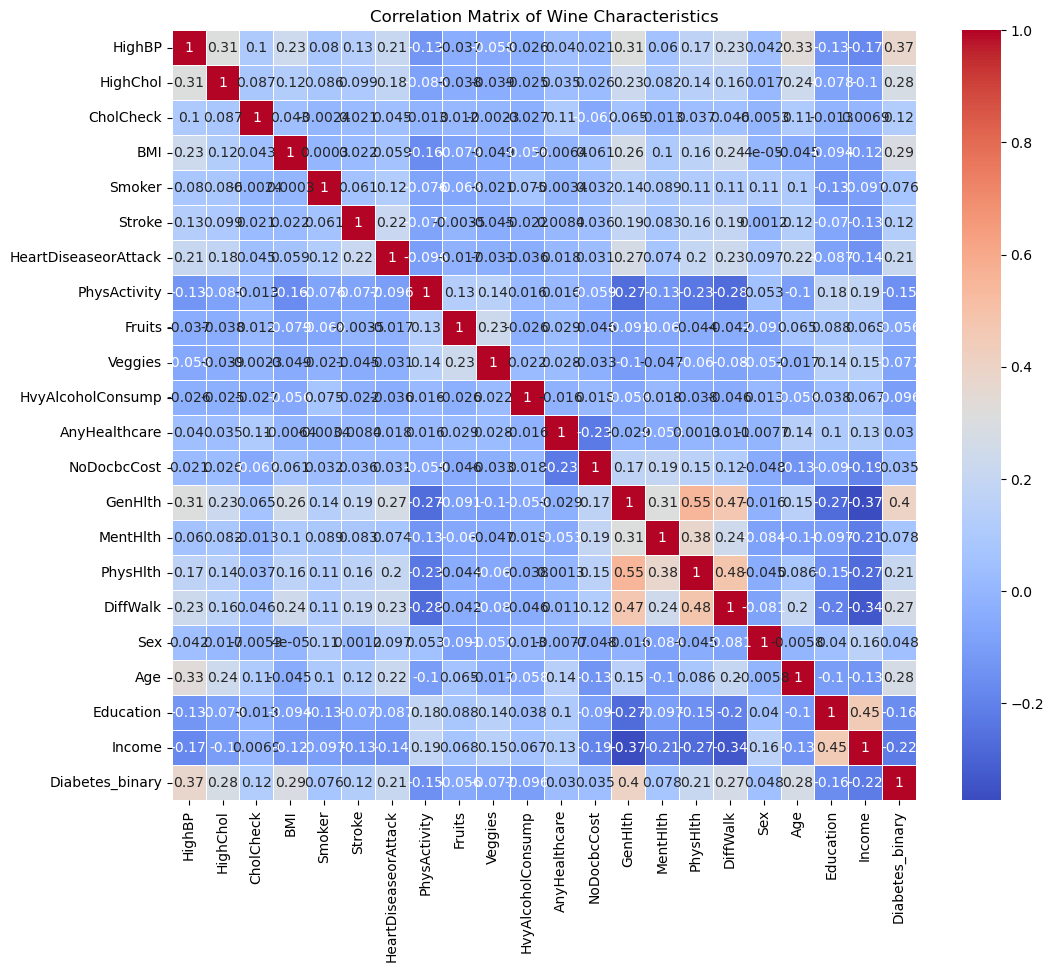

In [14]:
correlation_matrix = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Wine Characteristics")
plt.show()

In [16]:
beta = 2 ** (1/2)  
fbeta_scorer = make_scorer(fbeta_score, beta=beta)

In [18]:
X_train,X_test =train_test_split(X, test_size=0.25) 
blowout = ['Education'] 
df_no_blowout = X_train
for i in blowout:
    Q1 = X_train[i].quantile(0.25)
    Q3 = X_train[i].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_blowout = df_no_blowout[(df_no_blowout[i] >= lower_bound) & (df_no_blowout[i] <= upper_bound)]
X_train = df_no_blowout
y_train = X_train['Diabetes_binary']
y_test = X_test['Diabetes_binary']
X_train = X_train.drop(['Diabetes_binary'], axis=1)
X_test = X_test.drop(['Diabetes_binary'], axis=1)

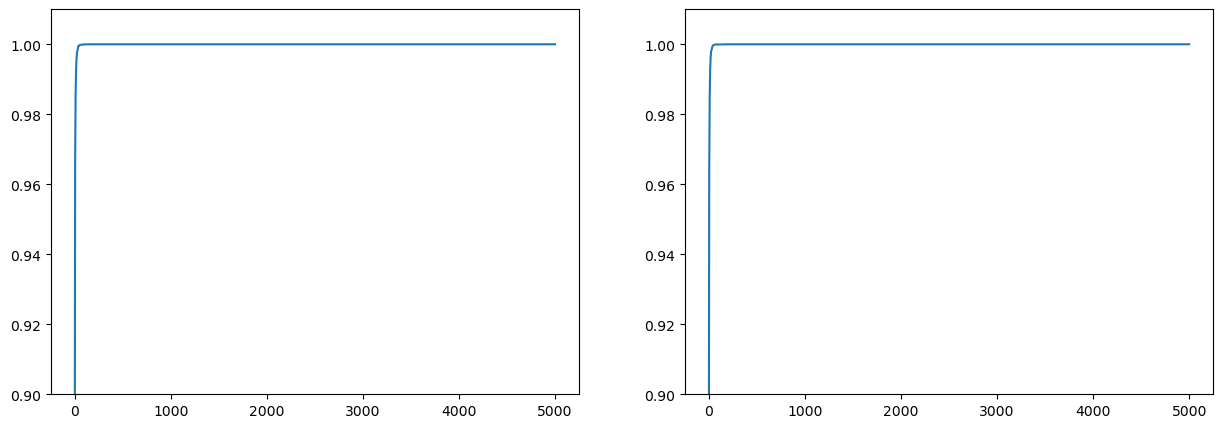

In [20]:
sc_train1 =[]
sc_test1 = []
sc_train2 =[]
sc_test2 = []
n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500, 1000, 5000]
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1)
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)

for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1, criterion= 'entropy')
    rf.fit(X_train, y_train)
    sc_train_n = rf.score(X_train, y_train)
    sc_test_n = rf.score(X_test, y_test)
    sc_train2.append(sc_train_n)
    sc_test2.append(sc_test_n)    
    
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(n_estimators,sc_train1)
ax1.plot(n_estimators,sc_test1)
ax1.set_ylim(0.9, 1.01)
ax2.plot(n_estimators,sc_train2)
ax2.plot(n_estimators,sc_test2)
ax2.set_ylim(0.9, 1.01);

In [21]:
y_values = []
for n in range(1, 31):
    RF = RandomForestClassifier(n_estimators=1000,n_jobs=-1, max_features='log2', warm_start=True, min_samples_leaf = n)
    RF.fit(X_train, y_train)
    y_test_pred = RF.predict(X_test)
    fbeta_test = fbeta_score(y_test, y_test_pred, beta=beta)
    y_values.append(fbeta_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


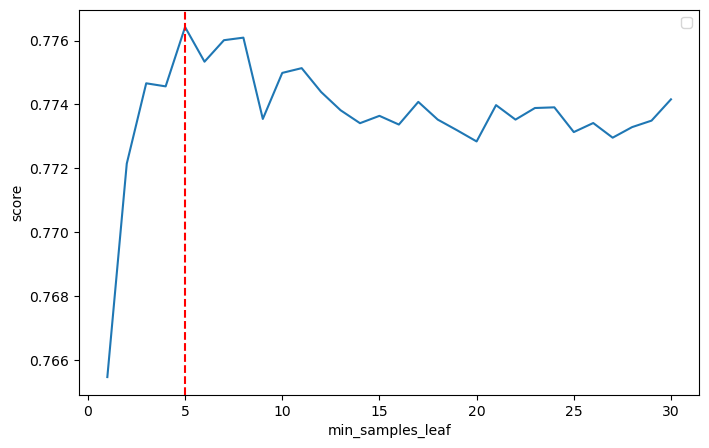

In [26]:
plt.figure(figsize=(8, 5))  
plt.plot(range(1, 31), y_values)  
plt.xlabel("min_samples_leaf")          
plt.ylabel("score")          
plt.legend() 
plt.axvline(x=5, color='red', linestyle='--')               
plt.show()  

In [28]:
y_values = []
for n in range(1, 51, 2):
    RF = RandomForestClassifier(n_estimators=1000,n_jobs=-1, max_features='log2', warm_start=True, min_samples_leaf = 5, max_depth = n)
    RF.fit(X_train, y_train)
    y_test_pred = RF.predict(X_test)
    fbeta_test = fbeta_score(y_test, y_test_pred, beta=beta)
    y_values.append(fbeta_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


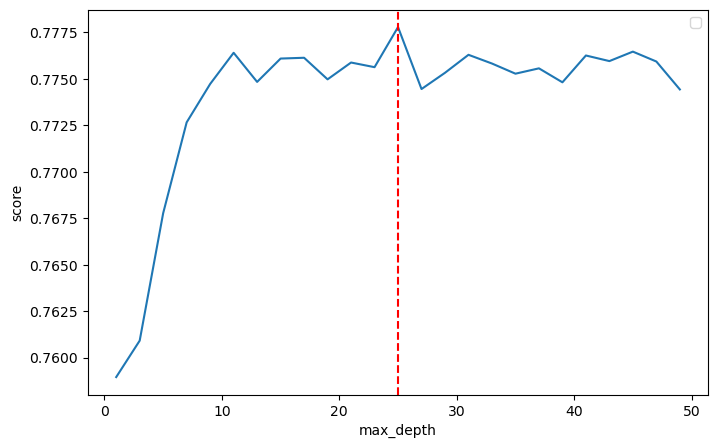

In [32]:
plt.figure(figsize=(8, 5))  
plt.plot(range(1, 51, 2), y_values)  
plt.xlabel("max_depth")          
plt.ylabel("score")          
plt.legend() 
plt.axvline(x=25, color='red', linestyle='--')
#plt.grid(True)                
plt.show()  

In [34]:
y_values = []
for n in range(2, 101, 2):
    RF = RandomForestClassifier(n_estimators=1000,n_jobs=-1, max_features='log2', warm_start=True, min_samples_leaf = 5, max_depth = 25,
                                min_samples_split = n)
    RF.fit(X_train, y_train)
    y_test_pred = RF.predict(X_test)
    fbeta_test = fbeta_score(y_test, y_test_pred, beta=beta)
    y_values.append(fbeta_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


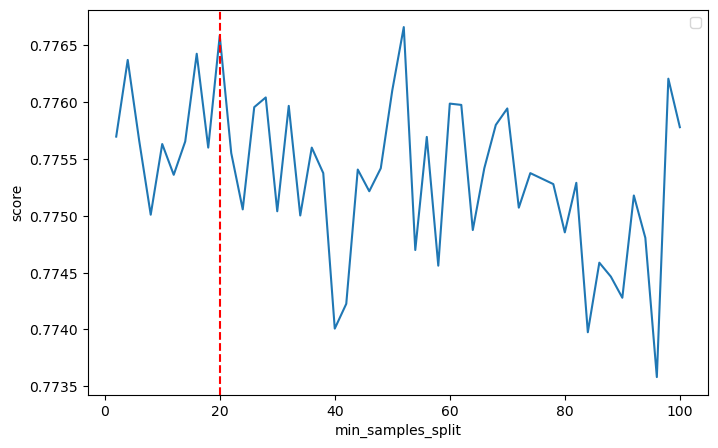

In [35]:
plt.figure(figsize=(8, 5))  
plt.plot(range(2, 101, 2), y_values)  
plt.xlabel("min_samples_split")          
plt.ylabel("score")          
plt.legend() 
plt.axvline(x=20, color='red', linestyle='--')
#plt.grid(True)                
plt.show() 

In [38]:
RF = RandomForestClassifier(n_estimators=1000,n_jobs=-1, max_features='log2', warm_start=True, min_samples_leaf = 5, max_depth = 25,
                                min_samples_split = 20)
RF.fit(X_train, y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)


beta = 2 ** (1/2)
fbeta_train = fbeta_score(y_train, y_train_pred, beta=beta)
fbeta_test = fbeta_score(y_test, y_test_pred, beta=beta)

print('Правильность на обучающем наборе (F_beta): {:.3f}'.format(fbeta_train))
print('Правильность на тестовом наборе (F_beta): {:.3f}'.format(fbeta_test))

Правильность на обучающем наборе (F_beta): 0.827
Правильность на тестовом наборе (F_beta): 0.776


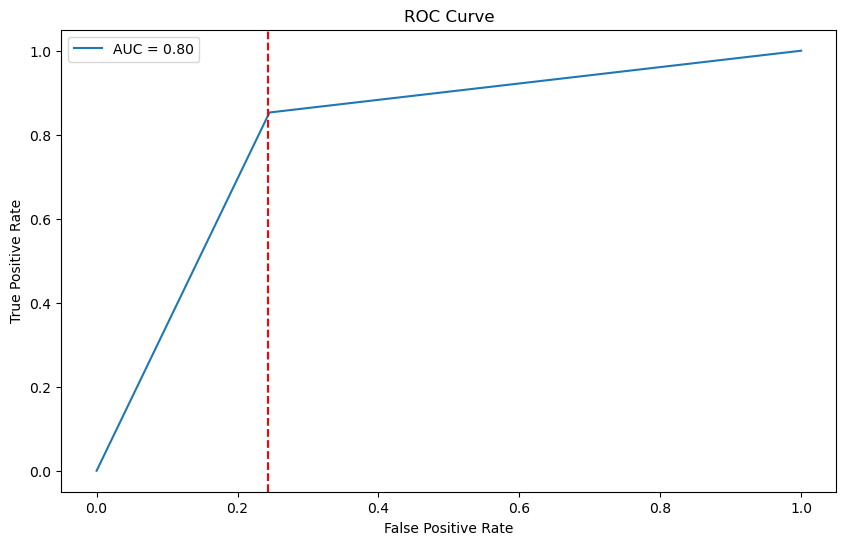

In [44]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

# Строим ROC-кривую
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.axvline(x=0.243, color='red', linestyle='--', label='x = 0.3')
plt.show()

In [46]:
RF = RandomForestClassifier(n_estimators=1000,n_jobs=-1, max_features='log2', warm_start=True, min_samples_leaf = 5, max_depth = 25,
                                min_samples_split = 20)
RF.fit(X_train, y_train)
y_train_pred = RF.predict_proba(X_train)[:, 1]
y_test_pred = RF.predict_proba(X_test)[:, 1]

threshold = 0.243
y_pred_train = (y_train_pred >= threshold).astype(int)
y_pred_test = (y_test_pred >= threshold).astype(int)

train_fbeta = fbeta_score(y_train, y_pred_train, beta=beta)
test_fbeta = fbeta_score(y_test, y_pred_test, beta=beta)

print('Правильность на обучающем наборе (F_beta): {:.3f}'.format(train_fbeta))
print('Правильность на тестовом наборе (F_beta): {:.3f}'.format(test_fbeta))

Правильность на обучающем наборе (F_beta): 0.833
Правильность на тестовом наборе (F_beta): 0.818


In [48]:
y_values = []
for n in range(1, 12, 1):
    GB = GradientBoostingClassifier(n_estimators=1000,  max_features = 'sqrt', max_depth = n)
    GB.fit(X_train, y_train)
    y_test_pred = GB.predict(X_test)
    fbeta_test = fbeta_score(y_test, y_test_pred, beta=beta)
    y_values.append(fbeta_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


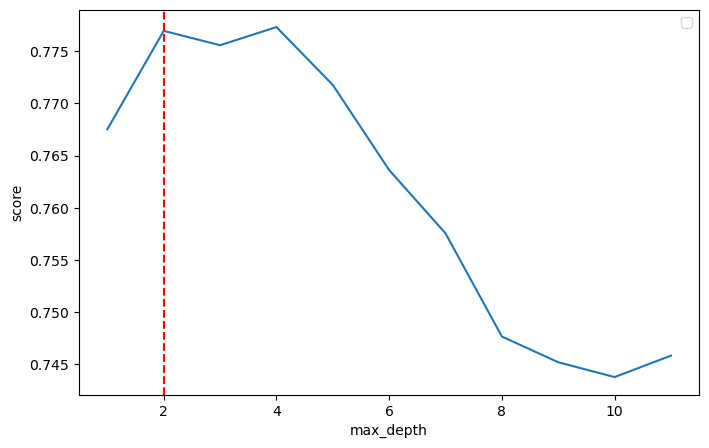

In [49]:
plt.figure(figsize=(8, 5))  
plt.plot(range(1, 12, 1), y_values)  
plt.xlabel("max_depth")          
plt.ylabel("score")          
plt.legend() 
plt.axvline(x=2, color='red', linestyle='--')
#plt.grid(True)                
plt.show() 

In [52]:
y_values = []
for n in np.arange(0.01, 1, 0.04):
    GB = GradientBoostingClassifier(n_estimators=1000,  max_features = 'sqrt', max_depth = 4, learning_rate= n )
    GB.fit(X_train, y_train)
    y_test_pred = GB.predict(X_test)
    fbeta_test = fbeta_score(y_test, y_test_pred, beta=beta)
    y_values.append(fbeta_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


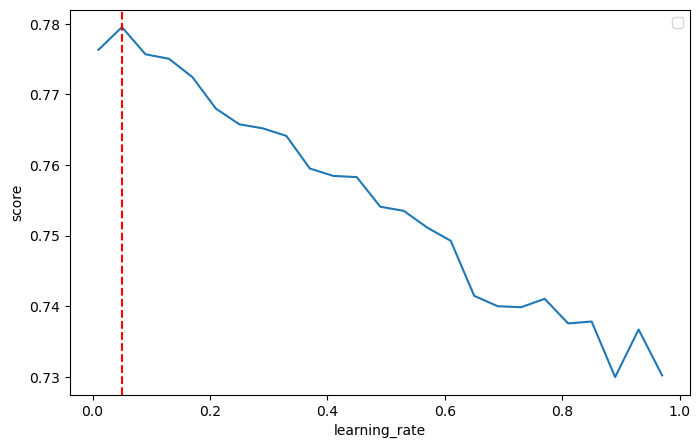

In [56]:
plt.figure(figsize=(8, 5))  
plt.plot(np.arange(0.01, 1, 0.04), y_values)  
plt.xlabel("learning_rate")          
plt.ylabel("score")          
plt.legend() 
plt.axvline(x=0.05, color='red', linestyle='--')
#plt.grid(True)                
plt.show() 

In [58]:
y_values = []
for n in np.arange(0.01, 1, 0.02):
    GB = GradientBoostingClassifier(n_estimators=1000,  max_features = 'sqrt', max_depth = 4, learning_rate= 0.05, subsample = n)
    GB.fit(X_train, y_train)
    y_test_pred = GB.predict(X_test)
    fbeta_test = fbeta_score(y_test, y_test_pred, beta=beta)
    y_values.append(fbeta_test)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


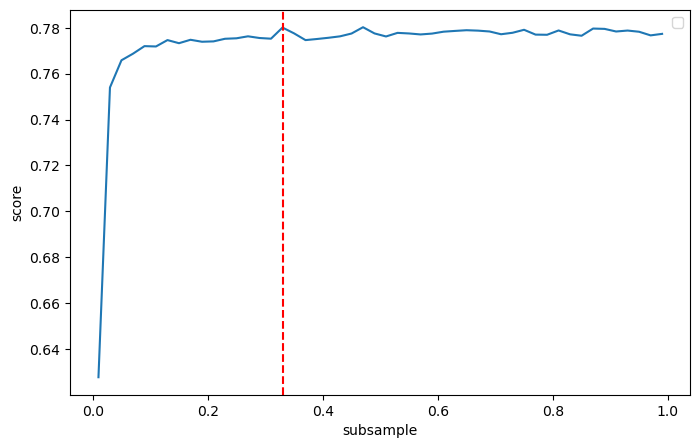

In [64]:
plt.figure(figsize=(8, 5))  
plt.plot(np.arange(0.01, 1, 0.02), y_values)  
plt.xlabel("subsample")          
plt.ylabel("score")          
plt.legend() 
plt.axvline(x=0.33, color='red', linestyle='--')              
plt.show() 

In [66]:
GB = GradientBoostingClassifier(
    n_estimators=1000,  
    learning_rate=0.05, 
    max_depth=4,       
    max_features = 'sqrt',
    subsample = 0.33
)
GB.fit(X_train, y_train)
y_train_pred = GB.predict(X_train)
y_test_pred = GB.predict(X_test)


beta = 2 ** (1/2)
fbeta_train = fbeta_score(y_train, y_train_pred, beta=beta)
fbeta_test = fbeta_score(y_test, y_test_pred, beta=beta)

print('Правильность на обучающем наборе (F_beta): {:.3f}'.format(fbeta_train))
print('Правильность на тестовом наборе (F_beta): {:.3f}'.format(fbeta_test))

Правильность на обучающем наборе (F_beta): 0.794
Правильность на тестовом наборе (F_beta): 0.778


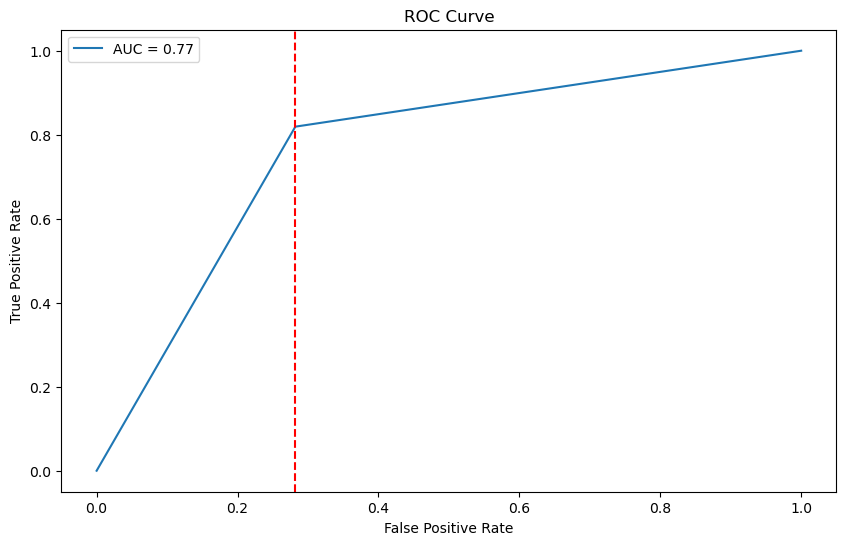

In [74]:
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)

# Строим ROC-кривую
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.axvline(x=0.282, color='red', linestyle='--', label='x = 0.3')
plt.show()

In [78]:
GB = GradientBoostingClassifier(
    n_estimators=1000,  
    learning_rate=0.05, 
    max_depth=4,       
    max_features = 'sqrt',
    subsample = 0.33
)
GB.fit(X_train, y_train)
y_train_pred = GB.predict_proba(X_train)[:, 1]
y_test_pred = GB.predict_proba(X_test)[:, 1]

threshold = 0.282
y_pred_train = (y_train_pred >= threshold).astype(int)
y_pred_test = (y_test_pred >= threshold).astype(int)

train_fbeta = fbeta_score(y_train, y_pred_train, beta=beta)
test_fbeta = fbeta_score(y_test, y_pred_test, beta=beta)

print('Правильность на обучающем наборе (F_beta): {:.3f}'.format(train_fbeta))
print('Правильность на тестовом наборе (F_beta): {:.3f}'.format(test_fbeta))

Правильность на обучающем наборе (F_beta): 0.828
Правильность на тестовом наборе (F_beta): 0.820
